# Introduction to Machine Learning

## By Data Science Team at Myant

# What is Machine Learning?

##### Concept that deals with study and construction of systems that:
* Extract meaning from data 
* Learn from data while improving their performance with experience. 


<img src="img/ecg.png" style="width: 400px;"/>

# Why use Machine Learning? 

##### Mimic humans and replace monotonous tasks. Example: self-driven cars, SKIIN signal quality estimators

##### Systems that automatically adapt and customize to users. Example: recommender systems of Netflix, Spotify etc, 

##### Natural language processing. Example: sentiment analysis algorithms of Twitter

##### Other examples: Prisma filters on Instagram, Deep dreams featured in Cold Ft. Future by Maroon 5



<img src="img/deepdreams.png" style="width: 800px;"/>

# How to make a machine learn new information?

<img src="img/ml1.jpg" style="width: 800px;"/>

# Types of Machine Learning
##### Supervised: correct classes of training data are known.
* Regression
* Classification

##### Unsupervised: correct classes of training  data are unknown. 
* Clustering
<img src="img/regclassclus.png" style="width: 500px;"/>

##### Reinforcement learning: system learns its behaviour based on feedback from enviroment

[Google's DeepMind](https://www.youtube.com/watch?v=gn4nRCC9TwQ "link title")

# Typical Machine Learning Pipeline
<img src="img/mlpipeline.png" style="width:1200px;"/>


# 1. Data Cleaning

## 1.1. Data as a combination of sinusoids

In [1]:
import numpy as np
import h5py
import pandas as pd
import scipy.signal
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool
import pandas as pd
from bokeh.plotting import figure, show

Fs = 100
T = 1/Fs
sample = 5000
x = np.arange(sample)
t = np.arange(sample)/Fs
a1 = 3
f1 = 2
y1 = a1 * np.sin(2 * np.pi * f1 * x / Fs)

a2 = 1
f2 = 20
y2 = a2 * np.sin(2 * np.pi * f2 * x / Fs)

y = y1 + y2 


start = 0
end = 200

df = pd.DataFrame()
df['t'] = t[start:end]
df['y1'] = y1[start:end]
df['y2'] = y2[start:end]
df['y'] = y[start:end]



In [2]:
output_notebook()
p = figure(plot_width=800, plot_height=250)
p.title.text = 'Signals as combinations of sinusoids'

p.line(df['t'], df['y1'] , line_width=2, alpha=0.8, legend='y1,(Fs=2Hz, A=3)', line_color="blue")
p.line(df['t'], df['y2'] , line_width=2, alpha=0.8, legend='y2,(Fs=20Hz, A=1)', line_color="green")
p.line(df['t'], df['y'] , line_width=2, alpha=0.8, legend='y, (y1 + y2)', line_color="red")
    
p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

Loading BokehJS ...

### Fourier Transform 

In [3]:
N = sample
yf = fft(y)
abs_yf =  2.0/N * np.abs(yf[0:int(N/2)])
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [4]:
hover = HoverTool(tooltips=[
    ("(Frequency,Amplitude)", "($x, $y)"),
])
output_notebook()
p = figure(plot_width=600, plot_height=300, tools=[hover,])
p.line(x=xf, y=abs_yf, color='black')
p.xaxis.axis_label = 'Frequency (Hz)'
p.yaxis.axis_label = 'Amplitude'
show(p)

Loading BokehJS ...

### Real Data

In [5]:
#f = h5py.File("/Users/rishabhgupta/Downloads/2495.hdf5", "r")
f = h5py.File("./data/ecg_test.hdf5", "r")

ecg = np.array(f['/signals/ecg'])
Fs_ecg = 200
T_ecg = 1/Fs_ecg
start = 0
end = 120000
t = np.arange(np.size(ecg,0))/Fs_ecg

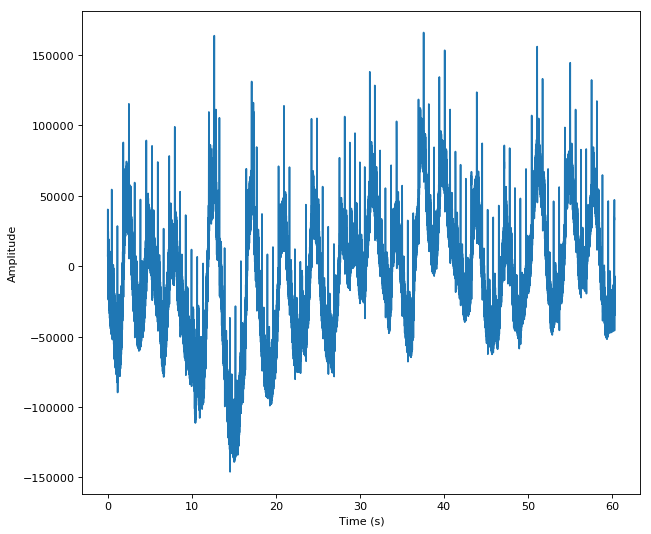

In [6]:

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[start:end],ecg[start:end,1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
N = np.size(ecg,0)
yf = fft(ecg[:,1])
abs_yf =  2.0/N * np.abs(yf[0:int(N/2)])
xf = np.linspace(0.0, 1.0/(2.0*T_ecg), N/2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [8]:
hover = HoverTool(tooltips=[
    ("(Frequency,Amplitude)", "($x, $y)"),
])
output_notebook()
p = figure(plot_width=600, plot_height=300, tools=[hover,])
p.line(x=xf, y=abs_yf, color='black')
p.xaxis.axis_label = 'Frequency (Hz)'
p.yaxis.axis_label = 'Amplitude'
show(p)

Loading BokehJS ...

## 1.2. Filtering

### Removing unwanted information (frequencies) from the signal using filters

<img src="img/filter.png" style="width: 500px;"/>

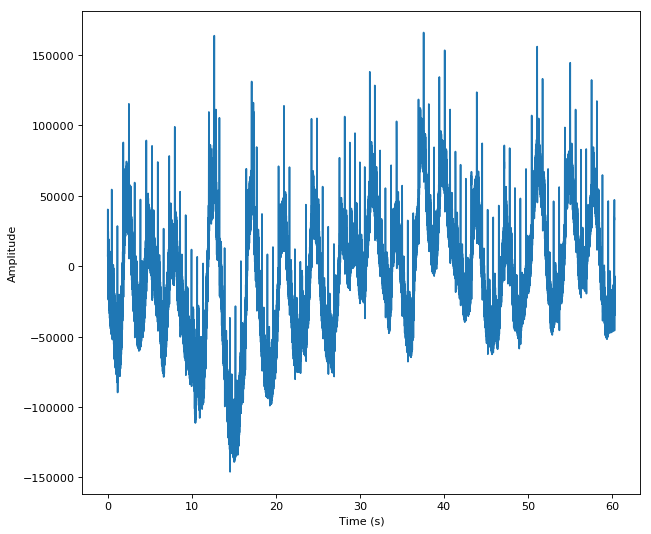

In [9]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[start:end],ecg[start:end,1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### High Pass Filter

In [10]:
N = 2 # Filter Order
cutoff = 5
Fs_nyq = Fs_ecg/2
Wn = cutoff/Fs_nyq
b, a = scipy.signal.butter(N, Wn, 'high') # Butterworth filter - highpass
hp_filtered_ecg = scipy.signal.filtfilt(b, a, ecg[:,1])
start = 0
end = 1000

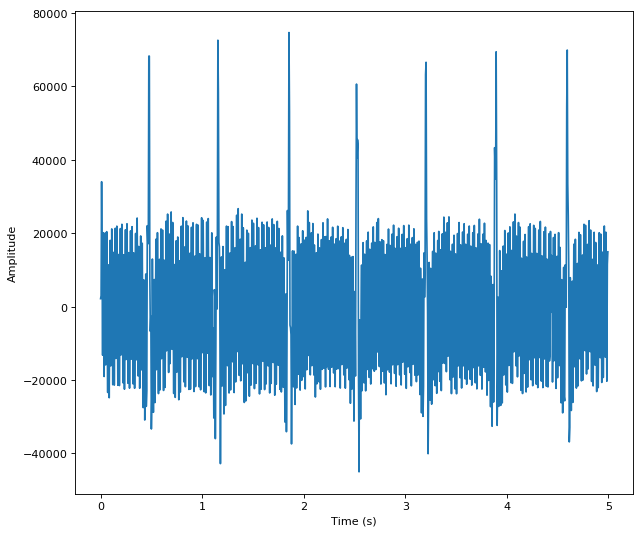

In [11]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[start:end], hp_filtered_ecg[start:end])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Low Pass Filter

In [12]:
N = 2 # Filter Order
cutoff = 30
Fs_nyq = Fs_ecg/2
Wn = cutoff/Fs_nyq
b, a = scipy.signal.butter(N, Wn, 'low') # Butterworth filter - lowpass
lp_hp_filtered_ecg = scipy.signal.filtfilt(b, a, hp_filtered_ecg)
start = 0
end = 1000

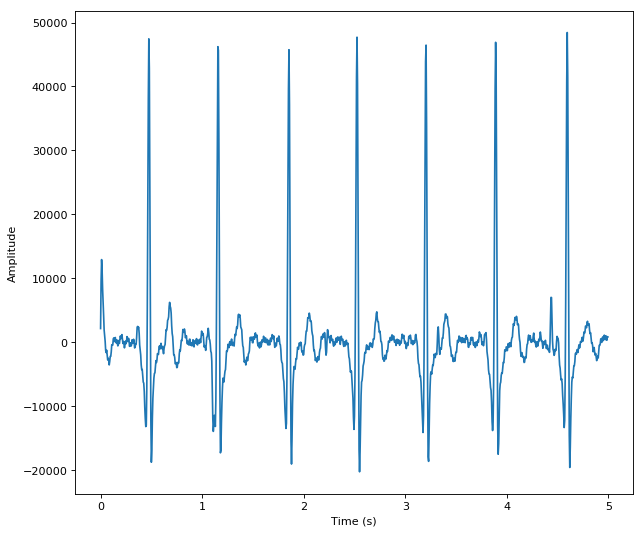

In [13]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t[start:end], lp_hp_filtered_ecg[start:end])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Fourier Transform of the filtered signal

In [14]:
N = np.size(lp_hp_filtered_ecg,0)
yf = fft(lp_hp_filtered_ecg)
abs_yf =  2.0/N * np.abs(yf[0:int(N/2)])
xf = np.linspace(0.0, 1.0/(2.0*T_ecg), N/2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [15]:
hover = HoverTool(tooltips=[
    ("(Frequency,Amplitude)", "($x, $y)"),
])
output_notebook()
p = figure(plot_width=600, plot_height=300, tools=[hover,])
p.line(x=xf, y=abs_yf, color='black')
p.xaxis.axis_label = 'Frequency (Hz)'
p.yaxis.axis_label = 'Amplitude'
show(p)

Loading BokehJS ...

# 2. Feature Construction 

In [16]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.signal 
import time
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
df = pd.read_csv("./data/sg1.csv", header=None)
df = df.T
k = df.as_matrix(columns=None)

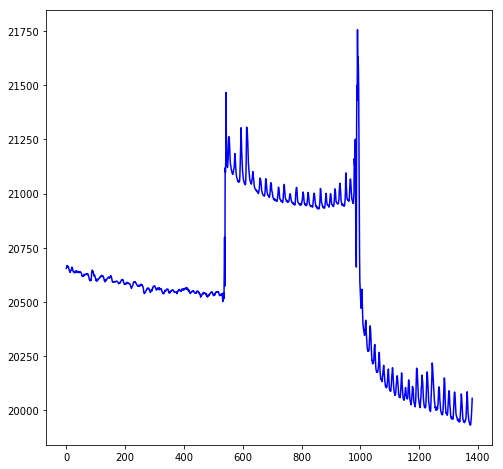

In [17]:
plt.plot(k[1][0:],'b-')
plt.show()

# 3. Feature Selection

In [18]:
df = pd.read_csv("./data/sg2.csv", header=None)
df = df.T
k2 = df.as_matrix(columns=None)

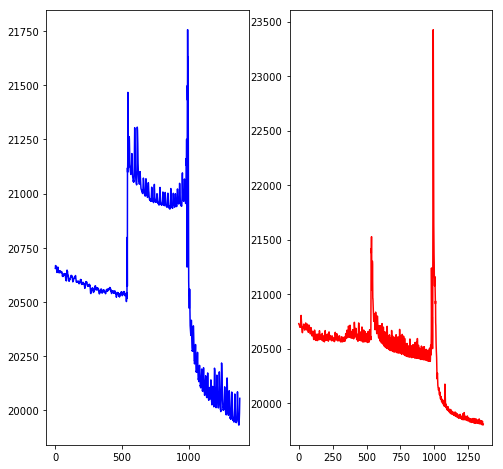

In [19]:
plt.subplot(1, 2, 1)
plt.plot(k[1][0:],'b-')
plt.subplot(1, 2, 2)
plt.plot(k2[1][0:],'r-')
plt.show()

# 4. Model Development

## Regression Model

##### Fit a line through data points

<img src="img/reg1.png" style="width: 500px;"/>



##### Make predictions based on the fitted line 

<img src="img/reg2.png" style="width: 500px;"/>

# Example: How do we use regression in SKIIN? 

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
# Regression with synthetic data
# Data
# Heart rate
hr = np.sort(np.random.randint(60, high=120, size=500))
# Stress: 0 - 1
st = np.sort(np.random.rand(500))

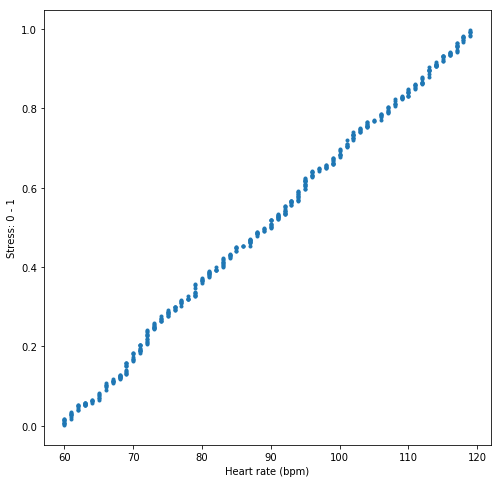

In [21]:
plt.plot(hr,st, '.')
plt.ylabel('Stress: 0 - 1')
plt.xlabel('Heart rate (bpm)')
plt.show()

## Use Least Square Estimation to fit a line

##### Equation of a line: $ y = \beta_{0}  x + \beta_{1} $

##### $\beta_{0}$ and $\beta_{1}$ are the slope and intercepts of the line

##### $\beta_{0}$ and $\beta_{1}$ are also model parameters which need to be estimated

##### Least squares formula: $ \beta = (X^{-1}X)X'Y$ 

## Least Squares Derivation

<img src="img/ls_derive.png" style="width: 400px;"/>

In [22]:
# Estimating the coefficient and intercept using linear algebra
# Using the equation beta = inv(x'x)x'y
y = np.matrix(st)
x = np.matrix(np.column_stack(
    (hr, np.ones(len(st)))))
b = np.linalg.inv(x.T * x) * x.T * y.T

# The coefficient and intercept estimated from matrix multiplication
beta_prime_coef = b[0]
beta_prime_intrp = b[1]

y_prime = x * b

The equation for the line is: Stress = [[ 0.01669321]] * Heart Rate + [[-0.98673883]]


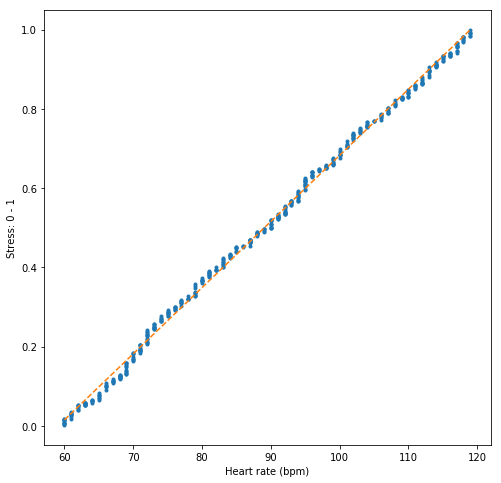

In [23]:
print('The equation for the line is: Stress = ' + str(b[0]) + ' * Heart Rate + ' + str(b[1]))
plt.plot(hr,st, '.')
plt.ylabel('Stress: 0 - 1')
plt.xlabel('Heart rate (bpm)')
plt.plot(hr, y_prime, '--')
plt.show()

## Classification Model

<img src="img/classification.png" style="width: 400px;"/>

## How can we use classification model for SKIIN? 

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from math import ceil, floor
from sklearn.metrics import accuracy_score
n_samples = 1000
# Mean HR
hr_1 = np.random.normal(60, 20, size=n_samples)
hr_2 = np.random.normal(100, 10, size=n_samples)

# Average minutes they worked out during the day
st_1 = np.random.normal(120, 20, n_samples)
st_2 = np.random.normal(50, 20, n_samples) + 1

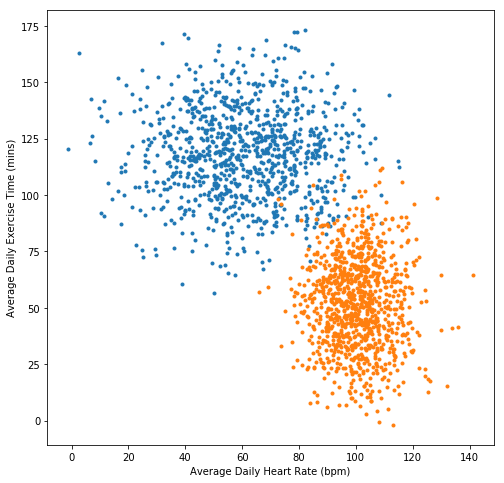

In [33]:
# Plotting the data
plt.plot(hr_1,st_1, '.')
plt.plot(hr_2,st_2, '.')
plt.ylabel('Average Daily Exercise Time (mins)')
plt.xlabel('Average Daily Heart Rate (bpm)')
plt.show()

## Least Squares Estimation of Model Parameters

In [34]:
# Binary classification
# Healthy class = -1
class_1 = -1*np.ones(len(hr_1))
# Unhealthy class = 1
class_2 =  np.ones(len(hr_2))

# Training data
feat_mat1 = np.column_stack((hr_1, st_1, class_1))
feat_mat2 = np.column_stack((hr_2, st_2, class_2))

X_temp = np.vstack((feat_mat1, feat_mat2))
np.random.shuffle(X_temp)

X_train = X_temp[:, 0:2]
Y_train = X_temp[:, 2]

X_trr = np.column_stack((X_train, np.ones(len(X_train))))
dot1 = np.linalg.inv(np.dot(X_trr.T, X_trr)) 
dot2 = np.dot(dot1,X_trr.T)
b_ls = np.dot(dot2,Y_train.T)


# Range of X-axis for the hyperplane
m_1_x = floor(np.min(X_train[:, 0]))
m_2_x = ceil(np.max(X_train[:, 0]))
x_ax = np.arange(m_1_x, m_2_x+1)

y_ls = np.zeros(len(x_ax))
for k in range(0, len(y_ls)):   
    y_ls[k] = -x_ax[k]*(b_ls[0]/b_ls[1]) - (b_ls[2]/b_ls[1])


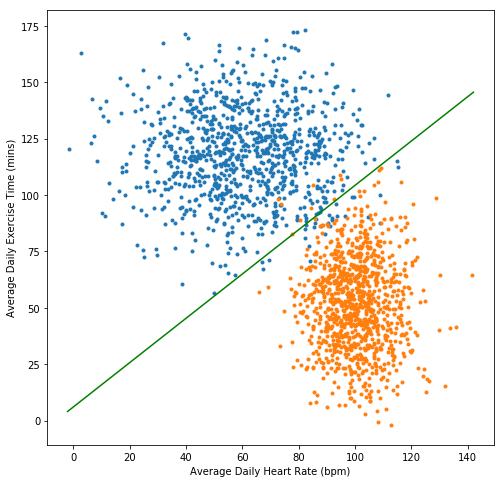

In [35]:
plt.plot(hr_1,st_1, '.')
plt.plot(hr_2,st_2, '.')
plt.ylabel('Average Daily Exercise Time (mins)')
plt.xlabel('Average Daily Heart Rate (bpm)')
plt.plot(x_ax, y_ls,'g')
plt.show()

# Perceptron approach for computing model parameters

In [28]:
# Initialize
w = np.zeros(len(X_train[0,0:2]))
b = 0
for k in range(0, len(X_train)):
    if np.sign(np.dot(w, X_train[k, :]) + b) != Y_train[k]:
        w = w + Y_train[k] * X_train[k, :]
        b = b + Y_train[k]

y_p = np.zeros(len(x_ax))
for k in range(0, len(y_p)):
    y_p[k] = -1*x_ax[k]*w[0]/w[1] - b/w[1]
    

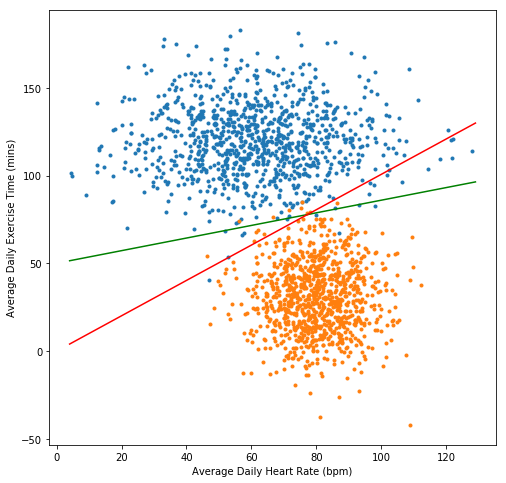

In [29]:
plt.plot(hr_1,st_1, '.')
plt.plot(hr_2,st_2, '.')
plt.ylabel('Average Daily Exercise Time (mins)')
plt.xlabel('Average Daily Heart Rate (bpm)')
plt.plot(x_ax, y_ls,'g')    
plt.plot(x_ax, y_p,'r')
plt.show()

# Conclusion

##### You learnt how to remove noise from the data

##### You learnt how to construct features

##### You learnt how to select features for classification/regression

##### You learnt how to develop regression and classification models

# Questions?? 